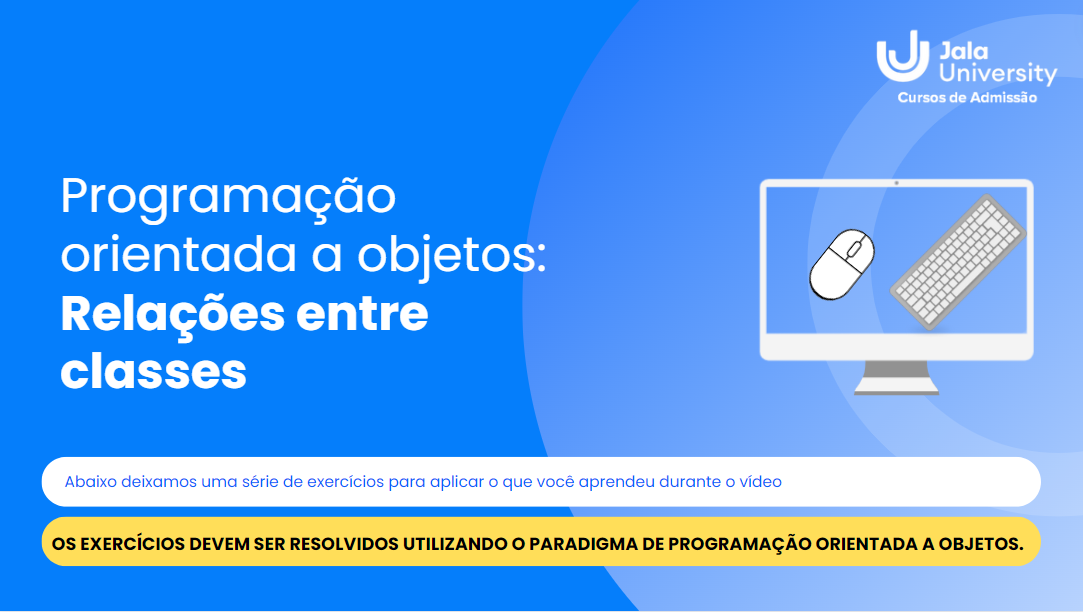

# **Exercícios**

1.- Escreva um programa que permita que vários alunos se matriculem em uma disciplina. Também inclua um método que permita ver quais alunos estavam matriculados na referida disciplina. Não se esqueça de usar classes.

In [ ]:
class Student:
    def __init__(self, name, age, discipline):
        self.name = name
        self.age = age
        self.discipline = discipline

    def __repr__(self):
        return f"name:{self.name} age:{self.age} discipline:{self.discipline}"


def print_infos(name, array, original_vacancies):
    vacancies = original_vacancies - len(array)
    print(f"{name.capitalize()}:")
    for names in array:
        print(names)
    print(f"\nVacancies: {vacancies}\n")


class School:
    def __init__(self, student: Student):
        self.students_portuguese = []
        self.portuguese_vacancies = 33
        self.students_geography = []
        self.geography_vacancies = 33
        self.students_history = []
        self.history_vacancies = 33
        self.students_mathematics = []
        self.mathematics_vacancies = 33
        self.student = student
        self.school_name = 'Greenwood Academy'

    def check_discipline(self, discipline_name):
        discipline_name = discipline_name.lower()

        disciplines = {
            'portuguese': (self.students_portuguese, self.portuguese_vacancies, 'Portuguese'),
            'geography': (self.students_geography, self.geography_vacancies, 'Geography'),
            'history': (self.students_history, self.history_vacancies, 'History'),
            'mathematics': (self.students_mathematics, self.mathematics_vacancies, 'Mathematics')

        }
        return disciplines.get(discipline_name, 'Error')

    def check_vacancy(self, discipline_param):
        if discipline_param == '' or discipline_param is None:
            return f"Error: Empty Value"
        elif not discipline_param.isalpha():
            return "Erro, Only Letters are allowed\n"

        resp = self.check_discipline(discipline_param)

        if resp == 'Error':
            return resp
        else:
            students_discipline, vacancies_discipline, discipline_name = resp
            if self.student.discipline is not None:
                return f"Error: {self.student.name} already enrolled in {self.student.discipline} discipline\n"
            elif len(students_discipline) == vacancies_discipline:
                return f"Error: The {discipline_name} discipline has already reached the maximum number of vacancies\n"
            else:
                return resp

    def enroll_student(self, discipline_param):
        resp = self.check_vacancy(discipline_param)
        if resp == 'Error':
            return f"\n{discipline_param} Not Exist\n"
        else:
            students_discipline, vacancies_discipline, discipline_name = resp
            students_discipline.append(self.student.name)
            vacancies_discipline -= 1
            self.student.discipline = discipline_name
            return f"\n{self.student.name}, your enrollment in the {discipline_name} discipline was successful\n"


    def cancel_enrollment(self):
        if self.student.discipline is None:
            return f"{self.student.name}, You are not enrolled in any discipline\n"
        else:
            discipline_students = self.check_discipline(self.student.discipline)[0]
            discipline_students.remove(self.student.name)
            self.student.discipline = None
            return f"{self.student.name}, Your enrollment has been successfully canceled\n"

    def information_student(self):
        return f"{self.school_name}\nStudent Name: {self.student.name}\nAge: {self.student.age}\nDiscipline: {self.student.discipline}\n"

    def disciplines_information(self):
        print_infos('portuguese', self.students_portuguese, self.portuguese_vacancies)
        print_infos('mathematics', self.students_mathematics, self.mathematics_vacancies)
        print_infos('history', self.students_history, self.history_vacancies)
        print_infos('geography', self.students_geography, self.geography_vacancies)

    def new_session(self, name, age):
        self.student.name = name
        self.student.age = age
        self.student.discipline = None


student_name = input("Insert Your Name: ")
student_age = int(input("Insert Your Age: "))
student = Student(student_name, student_age, None)
school_student = School(student)
while True:
    print("######################")
    print("# Menu of Operations #")
    print("######################")
    print(
        "1. Enroll\n2. Student Information\n3. Cancel Enrollment\n4. Disciplines Information\n5. End Session\n6. Exit\n")
    choice = input("Operation: ")
    if choice == '1':
        print("\n######################")
        print("#     Disciplines    #")
        print("######################")
        print("Portuguese\nMathematics\nHistory\nGeography\nComing Soon...\n")
        discipline = input("Discipline: ")
        print(school_student.enroll_student(discipline))
        
    elif choice == '2':
        print(school_student.information_student())
    elif choice == '3':
        print(school_student.cancel_enrollment())
    elif choice == '4':
        school_student.disciplines_information()
    elif choice == '5':
        print("new Session")
        name = input("Insert Your Name: ")
        age = int(input("Insert Your Age: "))
        school_student.new_session(name, age)
    elif choice == '6':
        print("Closing School System...")
        break

    else:
        print("\nInvalid Command")


2.- Escreva um programa muito básico semelhante a Netflix que permite adicionar filmes ou séries a uma lista de favoritos. Também inclua um método que permita ver quais filmes ou séries estão na lista de favoritos. Não se esqueça de usar classes.

In [ ]:
class Person:
    def __init__(self, name: str | None, age: int | None):
        self.name = name
        self.age = age


class SeriesFilms:
    def __init__(self, title: str | None, description: str | None, mpaa_rating: str | None, genre: str | None,
                 format_video: str | None):
        self.title = title
        self.description = description
        self.mpa_rating = mpaa_rating
        self.genre = genre
        self.format_video = format_video

    def __str__(self):
        return f"\nTitle: {self.title}\nMPAA: {self.mpa_rating}  Genre: {self.genre}\nType: {self.format_video}\nDescription: {self.description}\n"


fast_furious = SeriesFilms('The Fast And Furious', 'A nice Film', 'PG-13', "Action", "Film")
jhon_wick = SeriesFilms('Jhon Wick', 'A nice Film', 'R', 'Action', 'Film')
neon_genesis = SeriesFilms('Neon Genesis Evangelion', 'A semi-perfect anime', 'NR', 'Psychological', 'Anime')
robot = SeriesFilms('Mr. Robot', 'A semi-perfect series', 'TV-MA', 'Crime, Drama, Thriller', 'Series')


class Netflix:
    def __init__(self, user: Person, films: [SeriesFilms], series: [SeriesFilms]):
        self.user = user
        self.movies = films
        self.series = series
        self.favorites_series = []
        self.favorites_movies = []

    def add_favorites_series(self, series_name: str | None):
        if series_name == '' or series_name is None:
            return "Error: Empty Value"
        elif series_name.isalpha():
            return "Error: Only letters Are Allowed"
        series_name.lower()
        series_add = ''
        search_result = False
        err_msg = ''
        for i in self.series:
            if series_name == i.title.lower():
                if i.title in self.favorites_series:
                    err_msg = f"{self.user.name}, you've already bookmarked {i.title}"
                else:
                    self.favorites_series.append(i)
                    series_add = i.title
                    search_result = True
        if search_result:
            return f"Andrel, {series_add} has been successfully added to favorites"
        else:
            return err_msg

    def add_favorites_movies(self, movie_name: str | None):
        if movie_name == '' or movie_name is None:
            return "Error: Empty Value"
        movie_name.lower()
        movie_add = ''
        search_result = False
        err_msg = ''
        for i in self.movies:
            if movie_name == i.title.lower():
                if i.title in self.favorites_movies:
                    err_msg = f"{self.user.name}, you've already bookmarked {i.title}"
                else:
                    self.favorites_movies.append(i)
                    movie_add = i.title
                    search_result = True
        if search_result:
            return f"Andrel, {movie_add} has been successfully added to favorites"
        else:
            return err_msg

    def show_favorites(self, series_film: str):
        series_film.lower()
        favorite_choice = self.favorites_movies if series_film == 'movies' else self.favorites_series
        print('Favorites Series:' if series_film == 'series' else 'Favorite Movies:')
        for i in favorite_choice:
            print(i)

    def films_list(self):
        print("Films:")
        for i in self.movies:
            print(i)

    def series_list(self):
        print("Series:")
        for i in self.series:
            print(i)


name = input("Insert Your Name: ")
age = int(input("Insert Your Age: "))
new_person = Person(name, age)
new_user = Netflix(new_person, [fast_furious, jhon_wick], [neon_genesis, robot])
while True:

    print("######################")
    print("# Menu of Operations #")
    print("######################")
    print(
        "1. Movies and series available\n2. Add To favorite films\n3. add To favorite series\n4. Show favorite films or series\n5. New Session\n6. Exit")
    choice = int(input("Insert number of operation: "))
    if choice == 1:
        new_user.films_list()
        new_user.series_list()
    elif choice == 2:
        new_user.films_list()
        movie = input('\nInsert the movie name: ')
        print(new_user.add_favorites_movies(movie))
    elif choice == 3:
        new_user.series_list()
        series = input("\nInsert the Series name: ")
        print(new_user.add_favorites_series(series))
    elif choice == 4:
        resp = input("Insert 'Series' for look favorite series or 'Movies' for favorite movies: ")
        new_user.show_favorites(resp)
    elif choice == 5:
        name = input("Insert Your Name: ")
        age = int(input("Insert Your Age: "))
        new_person = Person(name, age)
        new_user = Netflix(new_person, [fast_furious, jhon_wick], [neon_genesis, robot])
    elif choice == 6:
        print('Closing Netflix App...')
        break
    else:
        print('Error')

3.- Dada uma lista de números, escreva uma função que filtre declarativamente apenas os números pares e retorne a lista resultante.

In [ ]:
def par_imp(num_param):
    array_temp = num_param.split(',')
    nums_list = []
    for num in array_temp:
        try:
            nums_list.append(int(num))
        except ValueError:
            print(f"'{num}' não é um numero")

    par = [i for i in nums_list if i % 2 == 0]
    print('Numeros pares:')
    for i in par:
        print(i)


nums = input("digite os numeros, separe-os por virgula: ")
par_imp(nums)

4.- Dada uma lista de números inteiros, escreva uma função que converta declarativamente cada número em sua representação textual em formato de palavra (por exemplo, 5 em “cinco”) e retorne a lista resultante.

In [ ]:
def number_word(num):
    nums_word = {
        0: "zero", 1: "um", 2: "dois", 3: "três", 4: "quatro",
        5: "cinco", 6: "seis", 7: "sete", 8: "oito", 9: "nove",
        10: "dez", 11: "onze", 12: "doze", 13: "treze", 14: "quatorze",
        15: "quinze", 16: "dezesseis", 17: "dezessete", 18: "dezoito", 19: "dezenove",
        20: "vinte", 30: "trinta", 40: "quarenta", 50: "cinquenta",
        60: "sessenta", 70: "setenta", 80: "oitenta", 90: "noventa"
    }
    array_temp = num.split(',')
    nums_list = []
    for i in array_temp:
        if not i.isalpha():
            nums_list.append(int(i))

    words_list = []
    for i in nums_list:
        var_temp = nums_word.get(i)
        words_list.append(var_temp)

    return words_list


nums = input("digite os numeros que deseja ver por extenso, separados por ',': ")
print(number_word(nums))


5.-Existe uma classe chamada ReprodutorMusica que gerencia a reprodução de músicas, a criação de listas de reprodução e a geração de recomendações. Refatore a classe para respeitar o princípio da responsabilidade única.

In [ ]:
class Musicas:
    def __init__(self, nome_musica: str, nome_album,cantor: str,  duracao: float, tipo: str):
        self.nome_musica = nome_musica
        self.cantor = cantor
        self.nome_album = nome_album
        self.duracao = duracao
        self.tipo = tipo

    def __str__(self):
        return f"{self.nome_musica}\n{'Album' if self.tipo == 'Album' else 'Ep'}: {self.nome_album}\nDuração: {self.duracao}\nCantor: {self.cantor}\n"

atlas = Musicas('Atlas', 'Atlas', 'Caio Ocean', 1.42, 'Single')
medo_quase_nada = Musicas('Medo De Quase Nada', 'Eu Ainda Tenho Coração', 'Leall', 2.45, 'Album')
vivencia_maldita = Musicas('Vivência Maldita', 'Eu Ainda Tenho Coração', 'Leall', 2.22, 'Album')
thil_further_notice = Musicas('Thil Further Notice', 'Utopia', 'Travis Scott', 5.14, 'Album')

class ReprodutorMusica:
    def __init__(self, musicas: [Musicas]):
        self.musicas = musicas
        self.album = []
        self.ep = []
        self.single = []
        self.listas_reproducao = []


    def separar_musicas(self):
        for i in self.musicas:
            if i.tipo == 'Album':
                self.album.append(i)
                print(self.album)
            elif i.tipo == 'Ep':
                self.ep.append(i)
                print(self.ep)
            elif i.tipo == 'Single':
                self.single.append(i)

    def reproduzir_musica(self, musica):
        # lógica para tocar uma música
        ...

    def criar_lista_reproducao(self, nome_lista):
        # lógica para criar uma lista de reprodução
        ...

    def gerar_recomendacoes(self):
        # lógica para gerar recomendações com base em preferências
        ...
    def mostrar_musicas(self):
        for i in self.musicas:
            print(i)

    def mostrar_ep(self):
        print(self.musicas)


reprodutor = ReprodutorMusica([atlas, medo_quase_nada, vivencia_maldita, thil_further_notice])
reprodutor.separar_musicas()
reprodutor.mostrar_ep()

6.- Existe uma classe chamada EstoqueHardware que trata do gerenciamento de produtos, pedidos e geração de relatórios de vendas. Refatore a classe para respeitar o princípio da responsabilidade única.

In [ ]:
class EstoqueHardware:
    def __init__(self):
        self.produtos = []
        self.pedidos = []


    def verificar_quantidade(self, produto):
        ...

    def adicionar_produto(self, produto):# gerenciamento dos produtos
        # lógica para adicionar produtos ao estoque
        if not produto == '':
            self.produtos.append(produto)
        else:
            return ''

    def realizar_pedido(self, produto, quantidade): # pedidos
        # lógica para encomendar produtos
        ...

    def gerar_relatorio_vendas(self): # relatorio
        # lógica para gerar relatórios de vendas
        ...


7.- Projete um conjunto de classes para calcular a área e o perímetro de diferentes figuras geométricas, como círculos, retângulos e triângulos. Certifique-se de aplicar o princípio DRY, evitando a repetição de códigos relacionados ao cálculo de áreas e perímetros.

8.- Implemente um sistema básico para gerenciar uma lista de tarefas pendentes (To Do List). Certifique-se de que a interface e as funções do sistema sejam simples e fáceis de entender. Evite adicionar recursos complexos desnecessários e concentre-se nas funcionalidades essenciais.